# K-Means Clustering
## Name: RJ Clemens
## Date: 2/13/25
## DSSA 5201

In [36]:
# Load the Python library numpy as name it np
import numpy as np # helps with numerical operations (ex. making a matrix)

# Load the Python library pandas and name it pd
import pandas as pd #helps with data set manipulation (ex. making a data frame)

import math #for euclidean distance and other formulas

import matplotlib.pyplot as plt #for graphing

# Read the Palmer Penguin dataset from a GitHub repository
penguins = pd.read_csv("https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv",delimiter=",")

#This is where we make a subset of the data and clean it focusing only on the variables used for the K-means clustering
#Choose two variables
kPenguins = penguins[['bill_depth_mm', 'body_mass_g']]

kPenguins = kPenguins.dropna(axis='index') # Drop the rows with NaN, i.e. missing data (Since we know there are very few we can drop them to keep consistent data)

kPenguins = np.asmatrix(kPenguins.to_numpy()) # Convert the Pandas DataFrame to a NumPy matrix (This will make it easier to perform mathematic operations on)

# Normalize the data to a 0-1 scale using Min-Max normalization
def normalize_data(data):
    min_vals = np.min(data, axis=0)  # Find the minimum value for each 
    max_vals = np.max(data, axis=0)  # Find the maximum value for each
    norm_data = (data - min_vals) / (max_vals - min_vals)  # Apply Min-Max normalization formula
    return norm_data

# Normalize the selected features 
normalized_penguins_matrix = normalize_data(kPenguins)

# This defines the function which will be used when performing the K means clustering.
# Function to compute the Euclidean distance between vecA and vecB
def distEclud(vecA, vecB):
    return np.sqrt(sum(np.power(vecA - vecB, 2)))[0,0] # compute the sqaure root of the sum of the differences sqaured. In other words, the Euclidean distance.

# Defines a function to assign k random centers and associate the appropriate data with each center
def randCent(dataSet, k):
    n = dataSet.shape[1] #Number of columns in the data set
    centroids = np.asmatrix(np.zeros((k,n)))#creates the matrix to store centroids
    for j in range(n):#create random cluster centers, within bounds of each dimension (loop through feature)
        minJ = min(dataSet[:,j]) # Find the min value for each feature
        rangeJ = float(max(dataSet[:,j]) - minJ) #calculate range (max-min) for each feature
        centroids[:,j] = np.asmatrix(minJ + rangeJ * np.random.rand(k,1)) #randomly select k centroids
    return centroids #return with the randomized centroids

In [38]:
# Defines a function to assign k random centers and associate the appropriate data with each center
def randCent(dataSet, k):
    n = dataSet.shape[1] #Number of columns in the data set
    centroids = np.asmatrix(np.zeros((k,n)))#creates the matrix to store centroids
    for j in range(n):#create random cluster centers, within bounds of each dimension (loop through feature)
        minJ = min(dataSet[:,j]) # Find the min value for each feature
        rangeJ = float(max(dataSet[:,j]) - minJ) #calculate range (max-min) for each feature
        centroids[:,j] = np.asmatrix(minJ + rangeJ * np.random.rand(k,1)) #randomly select k centroids
    return centroids #return with the randomized centroids

In [40]:
# Define the K means cluster function
def kMeans(dataSet, k, distMeas=distEclud, createCent=randCent):
    m = dataSet.shape[0]  
    clusterAssment = np.asmatrix(np.zeros((m, 2)))  # creates a matrix to store cluster (centroid) assignments and distances
    centroids = createCent(dataSet, k)  # Generate the initial random centroids
    
    #Loop Until the centroids do not change
    clusterChanged = True  # Will loop, continue to generate new centroids, as long has the clusters change. 

    while clusterChanged:
        clusterChanged = False # Assume this loop is the final loop, no changes to centroids
        for i in range(m):#for each data point assign it to the closest centroid
            minDist = math.inf; minIndex = -1 # initialize variables
            for j in range(k): # for each centroid,
                distJI = distMeas(centroids[j,:],dataSet[i,:]) # compute the Euclidean distance from this centroid to this data point
                if distJI < minDist: # If this data point is closer to this centroid
                    minDist = distJI; minIndex = j #update the minimum distance and the index of closest centroid
            if clusterAssment[i,0] != minIndex: clusterChanged = True #If the data point changes clusters mark that centroids need to be updated
            clusterAssment[i,:] = minIndex,minDist**2 # Assign this data point, i, to this centroid, centroid j
        # print(centroids) # Testing purposes
        for cent in range(k):#recalculate centroids, loop through each
            ptsInClust = dataSet[np.nonzero(clusterAssment[:,0].A==cent)[0]]# get all the points in this cluster
            centroids[cent,:] = np.mean(ptsInClust, axis=0) # assign centroid to mean of points in this cluster
    return centroids, clusterAssment #return final cluster and centroid assignments

/var/folders/31/bmqkk5s13cqg7x3fnb9k8ktc0000gn/T/ipykernel_11240/2433334309.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rangeJ = float(max(dataSet[:,j]) - minJ) #calculate range (max-min) for each feature


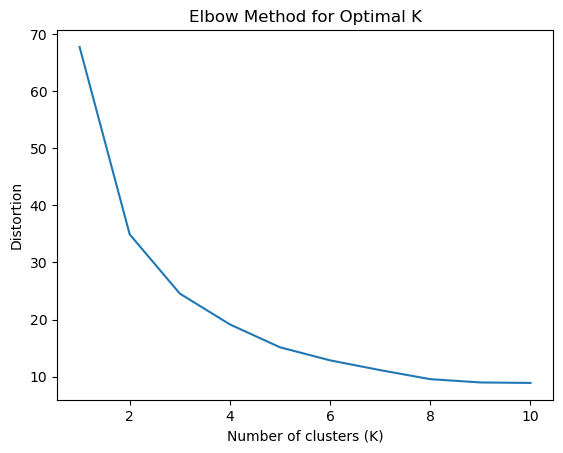

Centroids of the clusters:
[[0.19370271 0.61727674]
 [0.49951607 0.31865402]
 [0.73905187 0.33413938]]


In [42]:
# Function to apply the Elbow Method to find the optimal number of clusters (K)
def elbowMethod(dataSet, maxK):
    distortions = []  # List to store the distortion (intra-cluster distances) for each K
    for k in range(1, maxK + 1):  # Loop through different values of K (1 to maxK)
        centroids, _ = kMeans(dataSet, k)  # Run K-Means clustering for current value of K
        distortion = sum(np.min([distEclud(point, centroid) for centroid in centroids]) for point in dataSet)  # Compute total distortion (sum of squared distances)
        distortions.append(distortion)  # Append the distortion for this K value
    
    # Plot the Elbow Method graph to visualize the optimal K
    plt.plot(range(1, maxK + 1), distortions)  # Plot K vs. distortion
    plt.title('Elbow Method for Optimal K')  # Title of the graph
    plt.xlabel('Number of clusters (K)')  # X-axis label
    plt.ylabel('Distortion')  # Y-axis label
    plt.show()  # Show the graph

# Run the Elbow Method to determine the optimal K, testing values from 1 to 10
elbowMethod(normalized_penguins_matrix, 10)

# Run K-Means clustering with the chosen number of clusters (e.g., K=3)
myCentroids, clustAssing = kMeans(normalized_penguins_matrix, 3)

# Display the centroids of the clusters
print("Centroids of the clusters:")
print(myCentroids)


/var/folders/31/bmqkk5s13cqg7x3fnb9k8ktc0000gn/T/ipykernel_11240/2433334309.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rangeJ = float(max(dataSet[:,j]) - minJ) #calculate range (max-min) for each feature


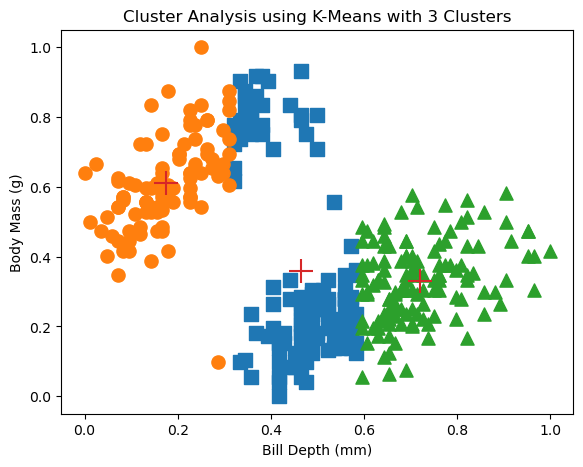

In [43]:
# Function to plot the clusters and their centroids
def showPlt(datMat, alg=kMeans, numClust=3):
    myCentroids, clustAssing = alg(datMat, numClust)  # Run K-Means clustering
    fig = plt.figure()  # Create a new figure for plotting
    rect = [0.1, 0.1, 0.8, 0.8]  # Set up the dimensions for the plot
    scatterMarkers = ['s', 'o', '^', '8', 'p', 'd', 'v', 'h', '>', '<']  # Different markers for clusters
    axprops = dict(xticks=[], yticks=[])  # Remove axis ticks
    ax0 = fig.add_axes(rect, label='ax0', **axprops)  # Add axis for the plot
    ax1 = fig.add_axes(rect, label='ax1', frameon=False)  # Add another axis for the plot without frame
    
    for i in range(numClust):  # Loop through each cluster
        ptsInCurrCluster = datMat[np.nonzero(clustAssing[:, 0].A == i)[0], :]  # Get all points in the current cluster
        markerStyle = scatterMarkers[i % len(scatterMarkers)]  # Select a marker style for the cluster
        ax1.scatter(ptsInCurrCluster[:, 0].flatten().A[0], ptsInCurrCluster[:, 1].flatten().A[0], marker=markerStyle, s=90)  # Plot the points for the cluster
    
    ax1.scatter(myCentroids[:, 0].flatten().A[0], myCentroids[:, 1].flatten().A[0], marker='+', s=300)  # Plot the centroids as '+' markers
    title = "Cluster Analysis using K-Means with " + str(numClust) + " Clusters"  # Title for the plot
    plt.title(title)  # Set the title of the plot
 # Adding axis labels
    plt.xlabel('Bill Depth (mm)')  # Label for the x-axis
    plt.ylabel('Body Mass (g)')  # Label for the y-axis
    plt.show()  # Display the plot


# Show the clusters and centroids for 3 clusters
showPlt(normalized_penguins_matrix, numClust=3)